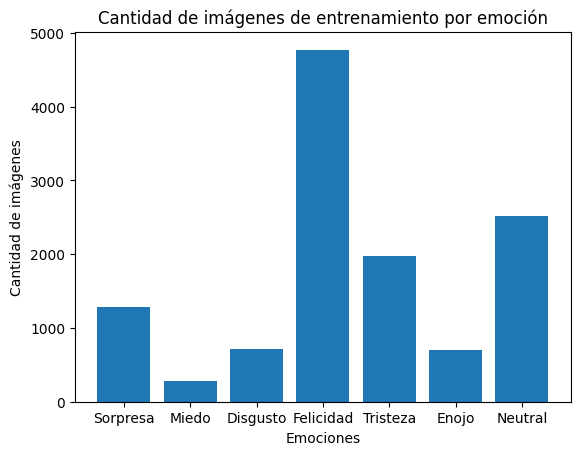

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Leer el archivo de texto como un DataFrame, especificando los nombres de las columnas
df = pd.read_csv(r"D:\2023-1\Proyecto de Carrera 2\basic\EmoLabel\list_patition_label.txt", delim_whitespace=True, names=["name_image", "emotion"])
train_df = df[df["name_image"].str.contains("train")]
surprise_df = train_df[train_df["emotion"] == 1]
fear_df = train_df[train_df["emotion"] == 2]
disgust_df = train_df[train_df["emotion"] == 3]
happiness_df = train_df[train_df["emotion"] == 4]
sadness_df = train_df[train_df["emotion"] == 5]
anger_df = train_df[train_df["emotion"] == 6]
neutral_df = train_df[train_df["emotion"] == 7]

num_surp_img=surprise_df.shape[0]
num_fear_img=fear_df.shape[0]
num_disg_img=disgust_df.shape[0]
num_happy_img=happiness_df.shape[0]
num_sad_img=sadness_df.shape[0]
num_anger_img=anger_df.shape[0]
num_neut_img=neutral_df.shape[0]
# Variables y sus valores
emociones = ['Sorpresa', 'Miedo', 'Disgusto', 'Felicidad','Tristeza','Enojo','Neutral']
cantidad = [num_surp_img, num_fear_img, num_disg_img,num_happy_img,num_sad_img,num_anger_img,num_neut_img]

# Crear el gráfico de barras
plt.bar(emociones, cantidad)

# Agregar etiquetas y título
plt.xlabel('Emociones')
plt.ylabel('Cantidad de imágenes')
plt.title('Cantidad de imágenes de entrenamiento por emoción')

# Mostrar el gráfico
plt.show()



In [3]:
def file_path_from_df(df_emotion):
    files_path=[]
    files=df_emotion.loc[:, 'name_image'].values
    for f in files:
        ruta_imagen = r"D:\2023-1\Proyecto de Carrera 2\basic\Image\aligned" + "\\"
        f = f.split(".")[0]
        f = f +"_aligned.jpg"
        ruta_imagen=ruta_imagen+f
        files_path.append(ruta_imagen)
    return(files_path)

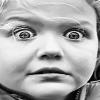

In [4]:
from PIL import Image

# Obtener la primera fila del DataFrame
files_path_surp = file_path_from_df(surprise_df)
imagen = Image.open(files_path_surp[0])

# Mostrar la imagen
display(imagen)



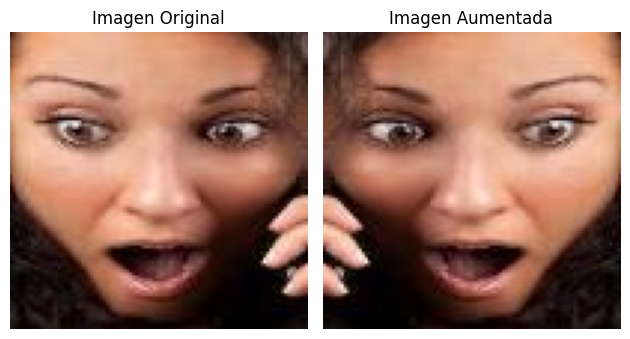

In [17]:
import torch
import torchvision.transforms as transforms


transform = transforms.Compose([
    #transforms.RandomRotation(180),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

# Cargar y transformar la imagen
image = Image.open(files_path_surp[32])
transformed_image = transform(image)

# Visualizar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Imagen Original')
plt.axis('off')

# Visualizar la imagen aumentada
plt.subplot(1, 2, 2)
augmented_image = transformed_image.permute(1, 2, 0)
plt.imshow(augmented_image)
plt.title('Imagen Aumentada')
plt.axis('off')

plt.tight_layout()
plt.show()






